In [1]:
# Adam Patyk
# CPSC 8430
# HW 1-1: Deep vs Shallow

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
import time
import matplotlib.pyplot as plt

### Part 1: Simulate a function
### Create models and validate number of parameters

# Model 0
class ShallowNetwork(nn.Module):
    def __init__(self):
        super(ShallowNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 196),
            nn.ReLU(),
            nn.Linear(196, 1),
        )

    def forward(self, x):
        return self.model(x)

# Model 1
class ModerateNetwork(nn.Module):
    def __init__(self):
        super(ModerateNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 5),
            nn.ReLU(),
            nn.Linear(5, 52),
            nn.ReLU(),
            nn.Linear(52, 5),
            nn.ReLU(),
            nn.Linear(5, 1),
        )

    def forward(self, x):
        return self.model(x)

# Model 2
class DeepNetwork(nn.Module):
    def __init__(self):
        super(DeepNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 2),
            nn.ReLU(),
            nn.Linear(2, 5),
            nn.ReLU(),
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 2),
            nn.ReLU(),
            nn.Linear(2, 1),
        )

    def forward(self, x):
        return self.model(x)

models = []
models.append(ShallowNetwork())
models.append(ModerateNetwork())
models.append(DeepNetwork())

for i in range(len(models)):
    num_params = sum(p.numel() for p in models[i].parameters())
    print(f'Model {i} parameters: {num_params}')
    

Model 0 parameters: 589
Model 1 parameters: 593
Model 2 parameters: 589


In [2]:
### Train models (skip if models already trained)

def standardize(data):
    mean = torch.mean(data)
    stddev = torch.std(data)

    data = (data - mean) / stddev

    return (data, mean, stddev)

def train(model, data, epochs):
    optimizer = optim.Adam(model.parameters())  # Adaptive learning rate (Adam) over stochastic gradient descent
    loss_func = nn.MSELoss()                    # use Huber loss for error
    model.zero_grad()
    training_loss = []

    for epoch in range(epochs):
        epoch_loss = 0.0
        for datum in data:
            input, target = datum[0].reshape(-1), datum[1].reshape(-1)
            optimizer.zero_grad()
            output = model(input)
            loss = loss_func(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        epoch_loss /= len(data)
        training_loss.append(epoch_loss)
        if epoch % 1000 == 999:
            print(f'Epoch: {epoch+1}/{epochs} \tLoss: {epoch_loss:.6f}', flush=True)
    
    return training_loss

epochs = 20000
num_data_points = 100

# create data points from function e^x * sin^2(3*pi*x)
data = np.zeros((num_data_points, 2))
data[:, 0] = np.arange(0, 1, 1/num_data_points)
data[:, 1] = np.exp(data[:, 0]) * np.sin(3 * math.pi * data[:, 0]) ** 2
data = torch.from_numpy(data).float()

training_loss = []
training_data, mean, stddev = standardize(data)

for i in range(len(models)):
    print(f'Training model {i}:')
    start_time = time.time()
    loss_arr = train(models[i], training_data, epochs)
    training_loss.append(loss_arr)
    total_time = (time.time() - start_time)
    torch.save(models[i], f'model{i}.pt')
    print(f'Time: {total_time//60:.0f} min {total_time%60:.2f} s')


Training model 0:
Epoch: 1000/20000 	Loss: 0.053936
Epoch: 2000/20000 	Loss: 0.020250
Epoch: 3000/20000 	Loss: 0.014468
Epoch: 4000/20000 	Loss: 0.032743
Epoch: 5000/20000 	Loss: 0.032812
Epoch: 6000/20000 	Loss: 0.032180
Epoch: 7000/20000 	Loss: 0.047390
Epoch: 8000/20000 	Loss: 0.024901
Epoch: 9000/20000 	Loss: 0.028098
Epoch: 10000/20000 	Loss: 0.022411
Epoch: 11000/20000 	Loss: 0.027906
Epoch: 12000/20000 	Loss: 0.020144
Epoch: 13000/20000 	Loss: 0.013675
Epoch: 14000/20000 	Loss: 0.013211
Epoch: 15000/20000 	Loss: 0.017023
Epoch: 16000/20000 	Loss: 0.016341
Epoch: 17000/20000 	Loss: 0.012853
Epoch: 18000/20000 	Loss: 0.023948
Epoch: 19000/20000 	Loss: 0.015029
Epoch: 20000/20000 	Loss: 0.012305
Time: 18 min 41.45 s
Training model 1:
Epoch: 1000/20000 	Loss: 0.234762
Epoch: 2000/20000 	Loss: 0.220114
Epoch: 3000/20000 	Loss: 0.214721
Epoch: 4000/20000 	Loss: 0.215926
Epoch: 5000/20000 	Loss: 0.219277
Epoch: 6000/20000 	Loss: 0.220461
Epoch: 7000/20000 	Loss: 0.205997
Epoch: 8000/20

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


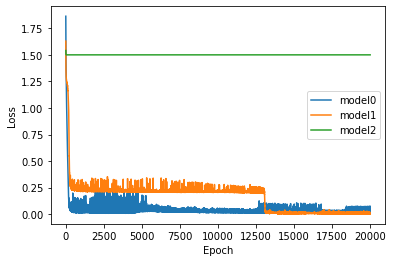

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


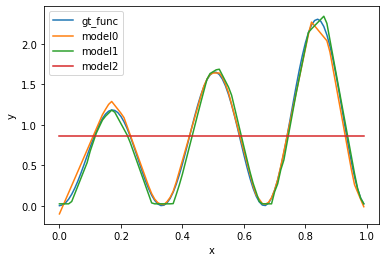

In [6]:
def inverse_standardize(data, mean, stddev):
    data = data * stddev + mean
    
    return data

### Plot results
# plot loss over epochs
for i in range(len(models)):
    plt.plot(np.arange(0, epochs), training_loss[i], label=f'model{i}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('loss_comparison.eps')
plt.show()

# plot values from final model
plt.plot(data[:, 0], data[:, 1], label='gt_func')
for i in range(len(models)):
    func_vals = []
    for datum in training_data:
        input = datum[0].reshape(-1)
        output = models[i](input)
        output = inverse_standardize(output, mean, stddev)
        func_vals.append(output)
    plt.plot(data[:, 0], func_vals, label=f'model{i}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('output_comparison.eps')
plt.show()

In [ ]:
# Part 2: Train on MNIST

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# train
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# test
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels  = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.105
[1,  4000] loss: 1.795
[1,  6000] loss: 1.648
[1,  8000] loss: 1.551
[1, 10000] loss: 1.489
[1, 12000] loss: 1.432
[2,  2000] loss: 1.380
[2,  4000] loss: 1.358
[2,  6000] loss: 1.289
[2,  8000] loss: 1.297
[2, 10000] loss: 1.283
[2, 12000] loss: 1.253
[3,  2000] loss: 1.187
[3,  4000] loss: 1.167
[3,  6000] loss: 1.171
[3,  8000] loss: 1.152
[3, 10000] loss: 1.172
[3, 12000] loss: 1.127
[4,  2000] loss: 1.052
[4,  4000] loss: 1.051
[4,  6000] loss: 1.081
[4,  8000] loss: 1.051
[4, 10000] loss: 1.087
[4, 12000] loss: 1.072
[5,  2000] loss: 0.998
[5,  4000] loss: 1.011
[5,  6000] loss: 0.990
[5,  8000] loss: 1.007
[5, 10000] loss: 0.990
[5, 12000] loss: 1.017
[6,  2000] loss: 0.918
[6,  4000] loss: 0.932
[6,  6000] loss: 0.933
[6,  8000] loss: 0.961
[6, 10000] loss: 0.965
[6, 12000] loss: 0.952
[7,  2000] loss: 0.854
[7,  4000] loss: 0.876
[7,  6000] loss: 0.901
[7,  8000] loss: 0.920
[7, 